In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings as w
w.filterwarnings("ignore")

In [57]:
data = pd.read_csv("Food and Calories - Sheet1.csv")

In [58]:
data.sample(10)

,Food,Serving,Calories
311,Pumpkin Soup,1 cup (245 g),71 cal
153,Ham and Cheese Sandwich,1 sandwich (146 g),352 cal
425,Mozzarella Pizza,1 slice (62 g),154 cal
158,Mac and Cheese,1 serving (189 g),699 cal
175,Pulled Pork Sandwich,1 sandwich (261 g),551 cal
254,Olive Oil,1 tbsp (15 ml),120 cal
407,Ziti,2 oz. (56 g),197 cal
479,Pink Grapefruit,1/2 grapefruit (123 g),52 cal
480,Plantain,1 plantain (179 g),218 cal
236,Whole Grain Wheat,1 cup (120 g),407 cal


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


In [60]:
data['Calories'] = data['Calories'].apply(lambda x:x.split()[0])
data['Serving'] = data['Serving'].apply(lambda x:x.split('(')[0])

In [61]:
data.sample(4)

,Food,Serving,Calories
173,Pork Chop,1 chop,295
455,Breadfruit,1/4 breadfruit,99
216,Polenta,1 cup,549
78,Dates,1 date,20


<AxesSubplot:>

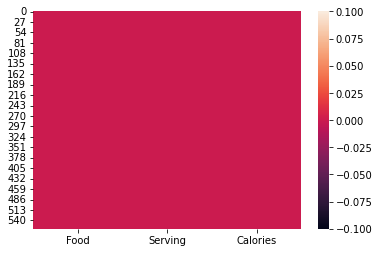

In [62]:
sns.heatmap(data.isnull())

In [63]:
data.nunique()

Food        541
Serving     162
Calories    307
dtype: int64

In [64]:
data.shape

(562, 3)

In [65]:
data[data.duplicated()]

,Food,Serving,Calories
95,Olives,1 olive,2
309,Pea Soup,1 cup,190
453,Avocado,1 avocado,320
454,Banana,1 banana,111
464,Guava,1 guava,37
466,Jackfruit,1 cup,143
471,Mango,1 mango,202
478,Pineapple,1 pineapple,453
481,Pomegranate,1 pomegranate,234
484,Rambutan,1 rambutan,7


In [66]:
data.describe()

,Food,Serving,Calories
count,562,562,562
unique,541,162,307
top,Tamarind,1 cup,124
freq,2,113,15


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


In [68]:
data.Calories = data.Calories.astype('int')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 13.3+ KB


In [70]:
fig = px.histogram(data,marginal="box",x="Calories",title="Calories Distribution")
fig.update_layout(bargap=0.2)

Text(0, 0.5, 'Count')

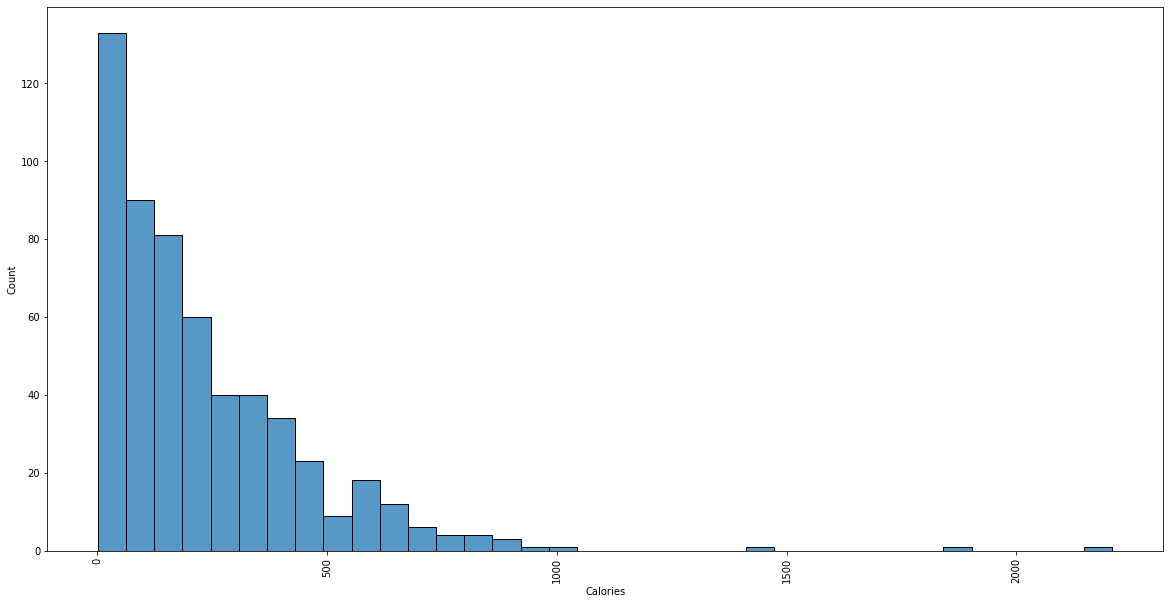

In [71]:
plt.figure(figsize=(20,10))
sns.histplot(data=data,x="Calories")
plt.xlabel("Calories")
plt.xticks(rotation=90)
plt.ylabel("Count")

In [72]:
data[data['Calories'] == data['Calories'].max()]

,Food,Serving,Calories
132,Chicken Marsala,1 serving,2209


In [73]:
data["Calories"].describe()

count     562.000000
mean      229.669039
std       232.303786
min         1.000000
25%        70.000000
50%       160.500000
75%       328.500000
max      2209.000000
Name: Calories, dtype: float64

In [74]:
data.sort_values(by="Calories")['Food'].iloc[-1:-20:-1]

132                           Chicken Marsala
299                                   Goulash
503                Burger King Triple Whopper
500    Burger King Double Whopper with Cheese
554                              Veggie Patty
206                                  Flaxseed
499                Burger King Double Whopper
460                                    Durian
414                                   Calzone
555                         Wendy’s Baconator
207                                   Freekeh
228                           Sunflower Seeds
156                                     Kebab
506           Burger King Whopper with Cheese
197                                Brown Rice
498                 Burger King Angry Whopper
162                                  Meatloaf
194                                  Amaranth
410                                Beef Pizza
Name: Food, dtype: object

Text(0, 0.5, 'Calories')

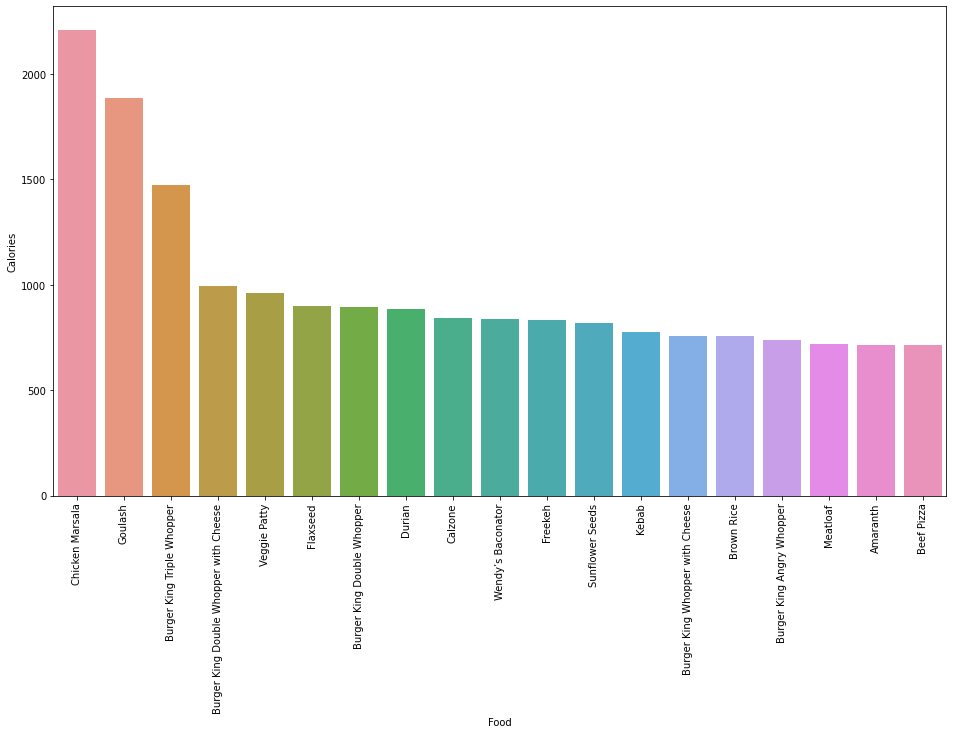

In [75]:
plt.figure(figsize=(16,9))
sns.barplot(x=data.sort_values(by="Calories")['Food'].iloc[-1:-20:-1].values,y=data.sort_values(by="Calories")['Calories'].iloc[-1:-20:-1].values,data=data)
plt.xlabel("Food")
plt.xticks(rotation=90)
plt.ylabel("Calories")

In [76]:
data.sample(10)

,Food,Serving,Calories
216,Polenta,1 cup,549
516,Chop Suey,1 serving,585
20,Corn,1 cup,562
492,Arby’s Roast Beef Classic,1 burger,360
316,Tomato Rice Soup,1 cup,116
474,Maraschino Cherries,1 cherry,8
509,Chicken Fajita,1 sandwich,326
116,Watermelon,1 wedge,86
342,Ice Cream Sandwich,1 bar,265
179,Roast Beef,1 slice,23


Text(0, 0.5, 'Count')

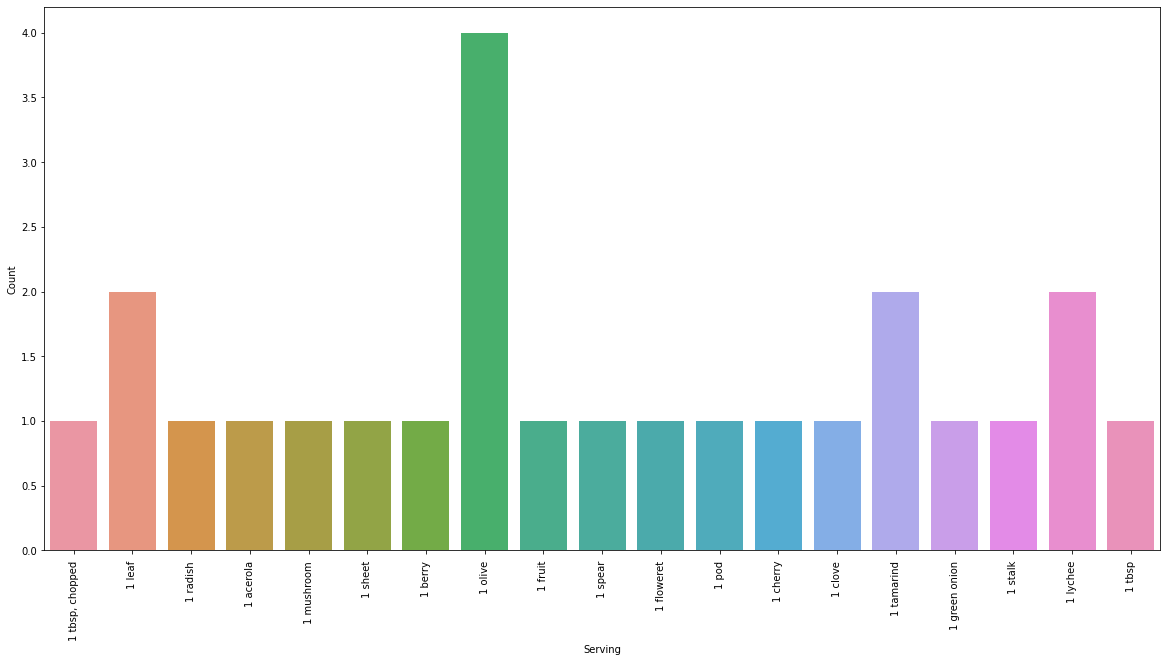

In [77]:
plt.figure(figsize=(20,10))
sns.countplot(data.sort_values(by="Calories")['Serving'].iloc[:25].values)
plt.xlabel("Serving")
plt.xticks(rotation=90)
plt.ylabel("Count")